In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Covid_Dataset=pd.read_excel(r"C:\Users\hp\Downloads\owid-covid-data.xlsx")

In [3]:
df=Covid_Dataset.copy()

In [4]:
df_icj=df.loc[(df["location"]=="India") | (df["location"]=="China") | (df["location"]=="Japan")]

In [5]:
df_icj.shape

(671, 36)

In [6]:
df_icj.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
6208,CHN,Asia,China,2019-12-31,27.0,27.0,0.0,0.0,0.019,0.019,...,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91
6209,CHN,Asia,China,2020-01-01,27.0,0.0,0.0,0.0,0.019,0.000,...,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91
6210,CHN,Asia,China,2020-01-02,27.0,0.0,0.0,0.0,0.019,0.000,...,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91
6211,CHN,Asia,China,2020-01-03,44.0,17.0,0.0,0.0,0.031,0.012,...,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91
6212,CHN,Asia,China,2020-01-04,44.0,0.0,0.0,0.0,0.031,0.000,...,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91


In [7]:
df_icj.location.value_counts()

China    224
Japan    224
India    223
Name: location, dtype: int64

In [8]:
def months(k):
    if ("-01-" in k) or ("-12-" in k):
        return "Janauary"
    if "-02-" in k:
        return "Febuary"
    if "-03-" in k:
        return "March"
    if "-04-" in k:
        return "April"
    if "-05-" in k:
        return "May"
    if "-06-" in k:
        return "June"
    if "-07-" in k:
        return "July"
    if "-08-" in k:
        return "August"

In [9]:
df_icj["Months"]=df["date"].apply(lambda k :months(k))

<ipython-input-9-3d40739b6338>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_icj["Months"]=df["date"].apply(lambda k :months(k))


In [10]:
df_icj.Months.value_counts()

Janauary    96
July        93
May         93
March       92
April       90
June        90
Febuary     87
August      30
Name: Months, dtype: int64

In [11]:
df_icj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671 entries, 6208 to 17629
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         671 non-null    object 
 1   continent                        671 non-null    object 
 2   location                         671 non-null    object 
 3   date                             671 non-null    object 
 4   total_cases                      671 non-null    float64
 5   new_cases                        671 non-null    float64
 6   total_deaths                     671 non-null    float64
 7   new_deaths                       671 non-null    float64
 8   total_cases_per_million          671 non-null    float64
 9   new_cases_per_million            671 non-null    float64
 10  total_deaths_per_million         671 non-null    float64
 11  new_deaths_per_million           671 non-null    float64
 12  new_tests        

In [12]:
for i in df_icj.columns:
    print(i," : ",df_icj[i].unique())

iso_code  :  ['CHN' 'IND' 'JPN']
continent  :  ['Asia']
location  :  ['China' 'India' 'Japan']
date  :  ['2019-12-31' '2020-01-01' '2020-01-02' '2020-01-03' '2020-01-04'
 '2020-01-05' '2020-01-06' '2020-01-07' '2020-01-08' '2020-01-09'
 '2020-01-10' '2020-01-11' '2020-01-12' '2020-01-13' '2020-01-14'
 '2020-01-15' '2020-01-16' '2020-01-17' '2020-01-18' '2020-01-19'
 '2020-01-20' '2020-01-21' '2020-01-22' '2020-01-23' '2020-01-24'
 '2020-01-25' '2020-01-26' '2020-01-27' '2020-01-28' '2020-01-29'
 '2020-01-30' '2020-01-31' '2020-02-01' '2020-02-02' '2020-02-03'
 '2020-02-04' '2020-02-05' '2020-02-06' '2020-02-07' '2020-02-08'
 '2020-02-09' '2020-02-10' '2020-02-11' '2020-02-12' '2020-02-13'
 '2020-02-14' '2020-02-15' '2020-02-16' '2020-02-17' '2020-02-18'
 '2020-02-19' '2020-02-20' '2020-02-21' '2020-02-22' '2020-02-23'
 '2020-02-24' '2020-02-25' '2020-02-26' '2020-02-27' '2020-02-28'
 '2020-02-29' '2020-03-01' '2020-03-02' '2020-03-03' '2020-03-04'
 '2020-03-05' '2020-03-06' '2020-03-07

In [13]:
l_u3=[]
l_nu3=[]
for i in df_icj.columns:
    if len(df_icj[i].unique())==3:
        l_u3.append(i)
    else:
        l_nu3.append(i)

In [14]:
l_u3

['iso_code',
 'location',
 'tests_units',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'male_smokers',
 'hospital_beds_per_thousand',
 'life_expectancy']

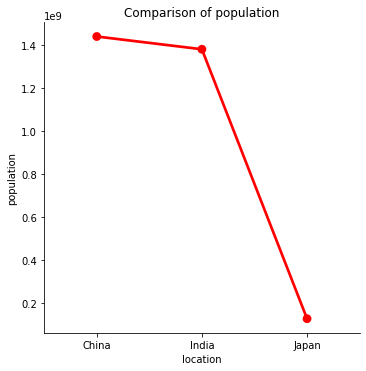

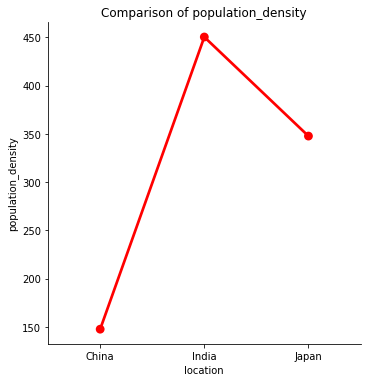

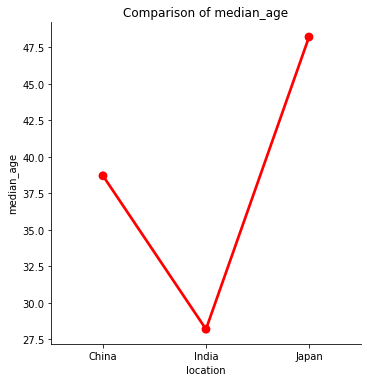

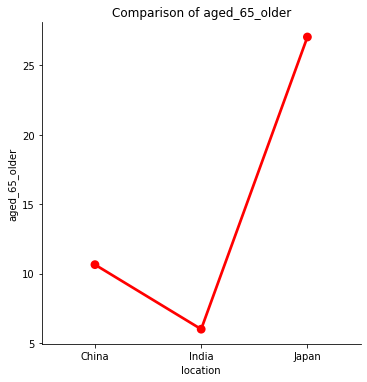

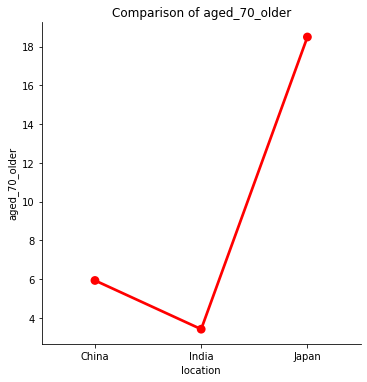

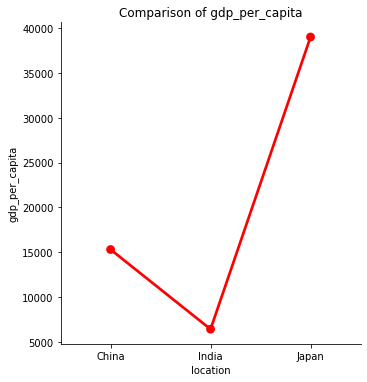

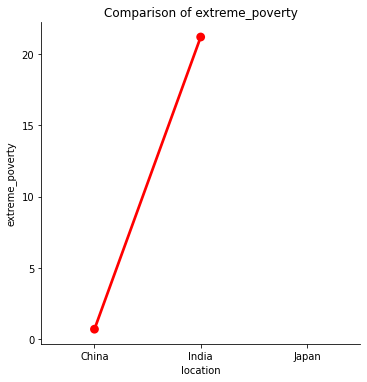

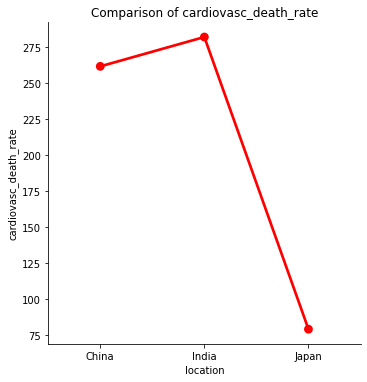

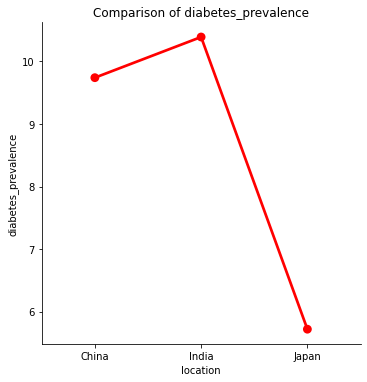

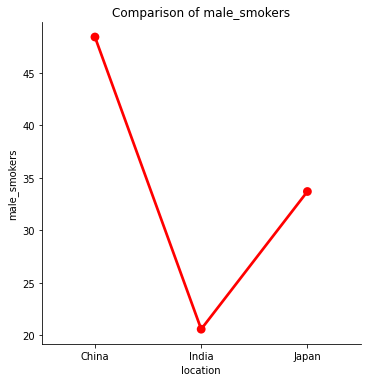

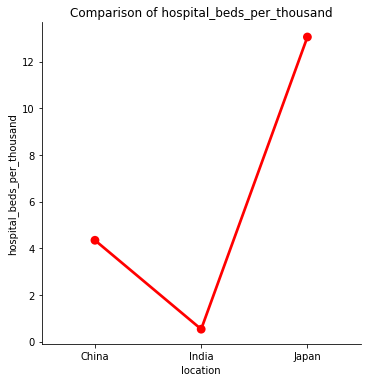

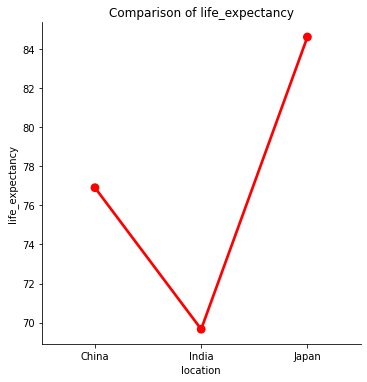

In [15]:
l=['population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
  'male_smokers',
 'hospital_beds_per_thousand',
 'life_expectancy']
for i in l:
    sns.catplot(x="location",y=i,data=df_icj,kind="point",color="r")
    plt.title("Comparison of {}".format(i))

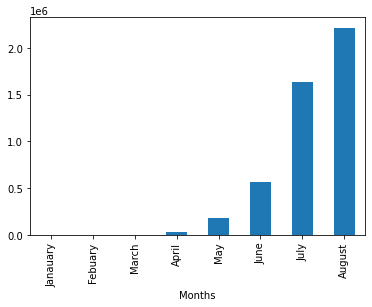

In [16]:
d=df_icj.loc[df["location"]=="India"].groupby(["Months"])["total_cases"].max().sort_values().plot.bar()

In [17]:
d=df_icj.loc[df["location"]=="India"].groupby(["Months"])["total_cases"].max().to_dict()

In [18]:
d

{'April': 33050.0,
 'August': 2215074.0,
 'Febuary': 3.0,
 'Janauary': 1.0,
 'July': 1638870.0,
 'June': 566840.0,
 'March': 1251.0,
 'May': 182143.0}

In [19]:
d_ind=pd.DataFrame()

In [20]:
d_ind["Country"]=[i for i in d.keys()]

In [21]:
d_ind["Total_cases"]=[i for i in d.values()]

In [22]:
d_ind.head()

,Country,Total_cases
0,April,33050.0
1,August,2215074.0
2,Febuary,3.0
3,Janauary,1.0
4,July,1638870.0


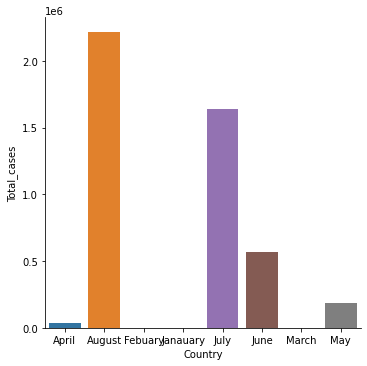

In [23]:
sns.catplot(x="Country",y="Total_cases",data=d_ind,kind="bar")

In [24]:
l=["Janauary","Febuary","March","April","May","June","July","August"]

In [25]:
dict={}
for i in l:
    dict[i]=d[i]

In [26]:
dict

{'Janauary': 1.0,
 'Febuary': 3.0,
 'March': 1251.0,
 'April': 33050.0,
 'May': 182143.0,
 'June': 566840.0,
 'July': 1638870.0,
 'August': 2215074.0}

In [27]:
d_india=pd.DataFrame()
d_india["Country"]=[i for i in dict.keys()]
d_india["Total_cases"]=[i for i in dict.values()]

In [28]:
d_india.head()

,Country,Total_cases
0,Janauary,1.0
1,Febuary,3.0
2,March,1251.0
3,April,33050.0
4,May,182143.0


In [29]:
df_icj.groupby(["location","Months"])["stringency_index"].mean()

location  Months  
China     April       60.213000
          August      81.940000
          Febuary     76.992759
          Janauary    21.595806
          July        81.940000
          June        80.336667
          March       79.526452
          May         74.681935
India     April       98.643333
          August      79.630000
          Febuary     10.190000
          Janauary     2.151613
          July        76.702903
          June        76.280000
          March       55.632333
          May         82.078710
Japan     April       45.739667
          August      31.587778
          Febuary     21.804483
          Janauary     2.241935
          July        26.132258
          June        25.923333
          March       41.158710
          May         41.904516
Name: stringency_index, dtype: float64

In [30]:
l=df_icj.loc[df_icj["location"]=="India"].groupby(["Months"])["new_deaths"].sum()/df_icj.groupby(["Months"])["new_cases"].sum()*100

In [31]:
df_icj.loc[df_icj["location"]=="India"]["Months"].value_counts()

Janauary    32
May         31
July        31
March       30
April       30
June        30
Febuary     29
August      10
Name: Months, dtype: int64

In [32]:
def plot(i):
    l=["Janauary","Febuary","March","April","May","June","July","August"]
    d1=df_icj.loc[df["location"]==i].groupby(["Months"])["total_cases"].max().to_dict()
    dict1={}
    for j in l:
        dict1[j]=d1[j]
    d_c=pd.DataFrame()
    d_c["Month"]=[i for i in dict1.keys()]
    d_c["Total_cases"]=[i for i in dict1.values()]
    sns.catplot(x="Month",y="Total_cases",data=d_c,kind="point",color="r")
    plt.xticks(rotation=45)
    plt.title("Total cases vs Months for {}".format(i))

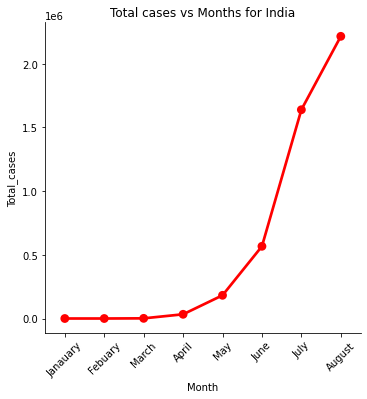

In [33]:
plot("India")

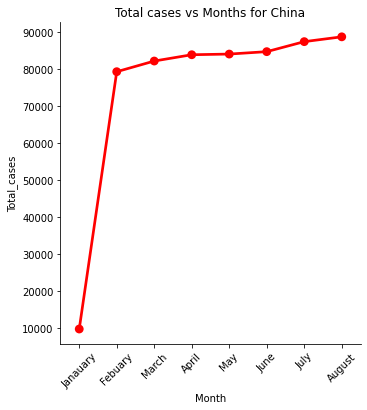

In [34]:
plot("China")

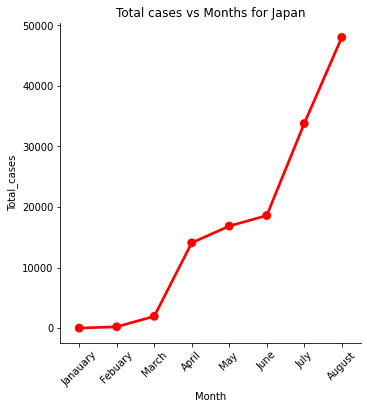

In [35]:
plot("Japan")

In [36]:
def plot2(i):
    l=["Janauary","Febuary","March","April","May","June","July","August"]
    d1=df_icj.loc[df["location"]==i].groupby(["Months"])["total_cases"].max().to_dict()
    dict1={}
    for j in l:
        dict1[j]=d1[j]
    d_c=pd.DataFrame()
    d_c["Month"]=[k for k in dict1.keys()]
    d_c["Total_cases"]=[k for k in dict1.values()]
    
    d2=df_icj.loc[df["location"]==i].groupby(["Months"])["stringency_index"].mean().to_dict()
    dict2={}
    for k in l:
        dict2[k]=d2[k]
    d_j=pd.DataFrame()
    d_j["Month"]=[k for k in dict2.keys()]
    d_j["stringency_index"]=[k for k in dict2.values()]
    fig,ax=plt.subplots()
    sns.pointplot(x="Month",y="Total_cases",data=d_c,ax=ax,color="r",linestyles=["--"])
    plt.xticks(rotation=45)
    ax2=ax.twinx()            
    sns.pointplot(x="Month",y="stringency_index",data=d_j,ax=ax2,color="b",markers=["D"])
    plt.xticks(rotation=45)
    plt.title("Total Cases and Stringency Index vs Months for {}".format(i))

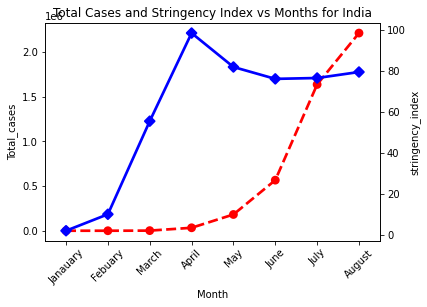

In [37]:
plot2("India")

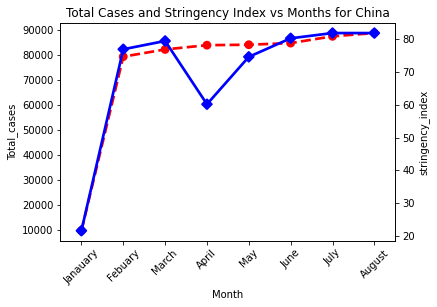

In [38]:
plot2("China")

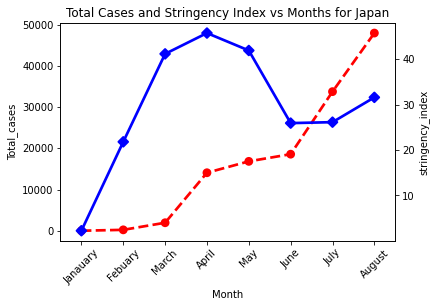

In [39]:
plot2("Japan")

In [40]:
def plot3(i):
    l=["Janauary","Febuary","March","April","May","June","July","August"]
    d1=df_icj.loc[df["location"]==i].groupby(["Months"])["total_cases"].max().to_dict()
    dict1={}
    for j in l:
        dict1[j]=d1[j]
    d_c=pd.DataFrame()
    d_c["Month"]=[k for k in dict1.keys()]
    d_c["Total_cases"]=[k for k in dict1.values()]
    
    d2=df_icj.loc[df["location"]==i].groupby(["Months"])["total_deaths"].mean().to_dict()
    dict2={}
    for k in l:
        dict2[k]=d2[k]
    d_j=pd.DataFrame()
    d_j["Month"]=[k for k in dict2.keys()]
    d_j["total_deaths"]=[k for k in dict2.values()]
    fig,ax=plt.subplots()
    sns.pointplot(x="Month",y="Total_cases",data=d_c,ax=ax,color="r",linestyles=["--"])
    plt.xticks(rotation=45)
    ax2=ax.twinx()            
    sns.pointplot(x="Month",y="total_deaths",data=d_j,ax=ax2,color="b",linestyles=':')
    plt.xticks(rotation=45)
    plt.title("Total Cases and Total Deaths vs Months for {}".format(i))

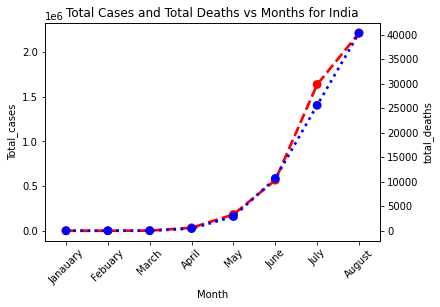

In [41]:
plot3("India")

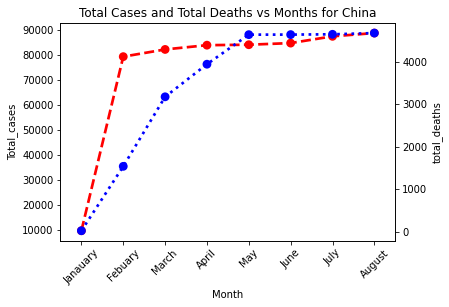

In [42]:
plot3("China")

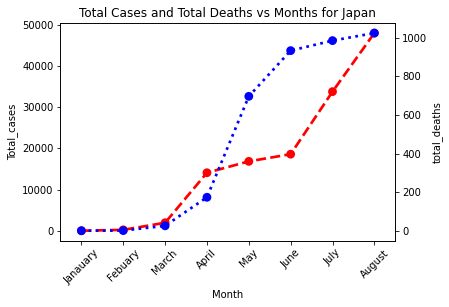

In [43]:
plot3("Japan")

Text(0.5, 1.0, 'Avg Stringency Index for Month')

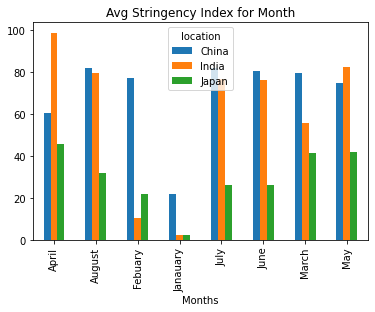

In [44]:
pd.pivot_table(df_icj,index="Months",columns="location",values="stringency_index").plot.bar()
plt.title("Avg Stringency Index for Month")

In [45]:
l=(df_icj.loc[df_icj["location"]=="India"].groupby(["Months"])["new_deaths"].sum()/df_icj.groupby(["Months"])["new_cases"].sum()*100).to_dict()

In [46]:
l

{'April': 2.2832350943313537,
 'August': 1.45997120279049,
 'Febuary': 0.0,
 'Janauary': 0.0,
 'July': 1.7298517322372284,
 'June': 3.0300368647165654,
 'March': 0.5463547891411986,
 'May': 2.6900815574848727}

In [47]:
def plot4(i):
    d=(df_icj.loc[df_icj["location"]==i].groupby(["Months"])["new_deaths"].sum()/df_icj.groupby(["Months"])["new_cases"].sum()).to_dict()
    l=["Janauary","Febuary","March","April","May","June","July","August"]
    dict1={}
    for j in l:
        dict1[j]=d[j]
    d_c=pd.DataFrame()
    d_c["Month"]=[k for k in dict1.keys()]
    d_c["Death Ratio"]=[k for k in dict1.values()]
    return d_c

In [48]:
ind=plot4("India")

In [49]:
ind

,Month,Death Ratio
0,Janauary,0.000000
1,Febuary,0.000000
2,March,0.005464
3,April,0.022832
4,May,0.026901
5,June,0.030300
6,July,0.017299
7,August,0.014600


In [50]:
df_icj.loc[df_icj["location"]=="India"].groupby(["Months"])["new_deaths"].sum()

Months
April        1042.0
August       8639.0
Febuary         0.0
Janauary        0.0
July        18854.0
June        11729.0
March          32.0
May          4090.0
Name: new_deaths, dtype: float64

In [51]:
df_icj.loc[df_icj["location"]=="India"].groupby(["Months"])["new_cases"].sum()

Months
April         31799.0
August       576204.0
Febuary           2.0
Janauary          1.0
July        1072030.0
June         384697.0
March          1248.0
May          149093.0
Name: new_cases, dtype: float64

In [52]:
# pd.pivot_table(df.loc[df["location"]=="India"],index="Months",values=["total_cases","new_cases","new_deaths"],aggfunc=[np.max,np.sum,np.sum])

In [53]:
chi=plot4("China")

In [54]:
jap=plot4("Japan")

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Janauary'),
  Text(1, 0, 'Febuary'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August')])

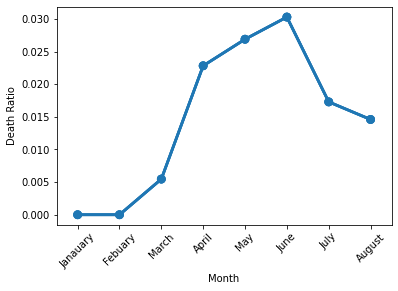

In [55]:
fig,ax=plt.subplots()
sns.pointplot(x="Month",y="Death Ratio",data=ind,ax=ax)
plt.xticks(rotation=45)
sns.pointplot(x="Month",y="Death Ratio",data=ind,ax=ax)
plt.xticks(rotation=45)
sns.pointplot(x="Month",y="Death Ratio",data=ind,ax=ax)
plt.xticks(rotation=45)

In [56]:
ind.set_index("Month")
chi.set_index("Month")
jap.set_index("Month")

,Death Ratio
Month,
Janauary,0.000000
Febuary,0.000043
March,0.009049
April,0.007866
May,0.003131
June,0.000209
July,0.000030
August,0.000071


In [57]:
cx=pd.DataFrame()

In [58]:
cx["Month"]=ind["Month"]

In [59]:
cx["Death Ratio India"]=ind["Death Ratio"]
cx["Death Ratio China"]=chi["Death Ratio"]
cx["Death Ratio Japan"]=jap["Death Ratio"]

In [60]:
cx=cx.set_index("Month")

In [61]:
cx

,Death Ratio India,Death Ratio China,Death Ratio Japan
Month,,,
Janauary,0.000000,0.021893,0.000000
Febuary,0.000000,0.037561,0.000043
March,0.005464,0.080587,0.009049
April,0.022832,0.029099,0.007866
May,0.026901,0.000007,0.003131
June,0.030300,0.000008,0.000209
July,0.017299,0.000017,0.000030
August,0.014600,0.000046,0.000071


Text(0.5, 1.0, 'Comparison of Death Ratios of India China Japan by Month')

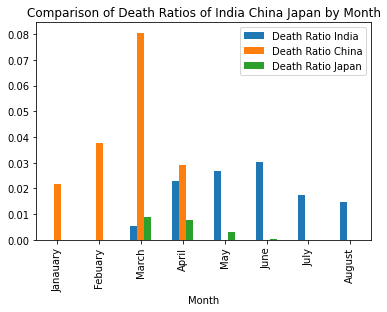

In [62]:
cx.plot.bar()
plt.title("Comparison of Death Ratios of India China Japan by Month")

In [63]:
def plot3(i):
    l=["Janauary","Febuary","March","April","May","June","July","August"]
    d1=df_icj.loc[df["location"]==i].groupby(["Months"])["total_cases"].max().to_dict()
    dict1={}
    for j in l:
        dict1[j]=d1[j]
    d_c=pd.DataFrame()
    d_c["Month"]=[k for k in dict1.keys()]
    d_c["Total_cases"]=[k for k in dict1.values()]
    
    d2=df_icj.loc[df["location"]==i].groupby(["Months"])["total_deaths"].mean().to_dict()
    dict2={}
    for k in l:
        dict2[k]=d2[k]
    d_j=pd.DataFrame()
    d_j["Month"]=[k for k in dict2.keys()]
    d_j["total_deaths"]=[k for k in dict2.values()]
    x=pd.DataFrame()
    x["Month"]=l
    x["Total_Cases"]=d_c["Total_cases"]
    x["Total_Deaths"]=d_j["total_deaths"]
    x.set_index("Month")
    x.plot.bar()

In [64]:
df_icj.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'Months'],
      dtype='object')

In [65]:
def plot5(i):
    l=["Janauary","Febuary","March","April","May","June","July","August"]
    d1=df_icj.loc[df["location"]==i].groupby(["Months"])["total_cases_per_million"].max().to_dict()
    dict1={}
    for j in l:
        dict1[j]=d1[j]
    d_c=pd.DataFrame()
    d_c["Month"]=[i for i in dict1.keys()]
    d_c["Total_cases"]=[i for i in dict1.values()]
    sns.catplot(x="Month",y="Total_cases",data=d_c,kind="bar")
    plt.xticks(rotation=45)
    plt.title("Total cases vs Months for {}".format(i))

Text(0.5, 1.0, 'Total_cases_per_million vs Month')

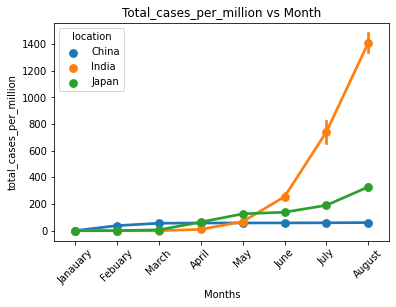

In [66]:
sns.pointplot(x="Months",y="total_cases_per_million",data=df_icj,hue="location")
plt.xticks(rotation=45)
plt.title("Total_cases_per_million vs Month")

Text(0.5, 1.0, 'Total_deaths_per_million vs Month')

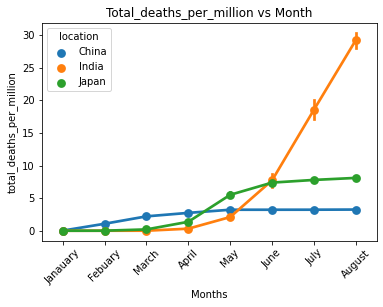

In [67]:
sns.pointplot(x="Months",y="total_deaths_per_million",data=df_icj,hue="location")
plt.xticks(rotation=45)
plt.title("Total_deaths_per_million vs Month")

In [68]:
def plot6(i):
    d=(df_icj.loc[df_icj["location"]==i].groupby(["Months"])["new_deaths_per_million"].sum()/df_icj.groupby(["Months"])["new_cases_per_million"].sum()*100).to_dict()
    l=["Janauary","Febuary","March","April","May","June","July","August"]
    dict1={}
    for j in l:
        dict1[j]=d[j]
    d_c=pd.DataFrame()
    d_c["Month"]=[k for k in dict1.keys()]
    d_c["Death Ratio"]=[k for k in dict1.values()]
    return d_c

In [69]:
ind1=plot6("India")

In [70]:
chi1=plot6("China")

In [71]:
jap1=plot6("Japan")

In [72]:
cx=pd.DataFrame()
cx["Month"]=ind["Month"]
cx["Death Ratio Per Million India"]=ind1["Death Ratio"]
cx["Death Ratio Per Million  China"]=chi1["Death Ratio"]
cx["Death Ratio Per Million  Japan"]=jap1["Death Ratio"]
cx=cx.set_index("Month")

In [73]:
cx

,Death Ratio Per Million India,Death Ratio Per Million China,Death Ratio Per Million Japan
Month,,,
Janauary,0.000000,2.142233,0.000000
Febuary,0.000000,3.641155,0.047910
March,0.139141,1.972172,2.565033
April,0.629904,0.767202,2.362349
May,2.279091,0.000769,2.895976
June,2.900450,0.001024,0.219462
July,1.519904,0.001446,0.029374
August,1.179447,0.003391,0.062542


Text(0.5, 1.0, 'Comparison of Death Ratios per Million of India China Japan by Month')

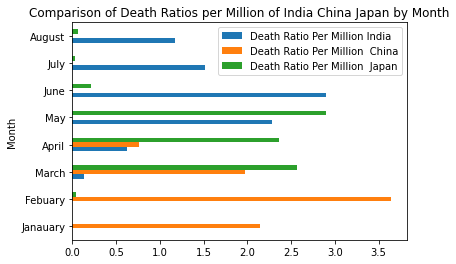

In [74]:
cx.plot.barh()
plt.title("Comparison of Death Ratios per Million of India China Japan by Month")

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Janauary'),
  Text(1, 0, 'Febuary'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August')])

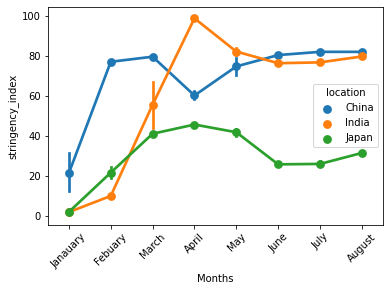

In [75]:
sns.pointplot(x="Months",y="stringency_index",data=df_icj,hue="location")
plt.xticks(rotation=45)

In [76]:
df_icj.groupby(["location"])["total_cases"].max()

location
China      88793.0
India    2215074.0
Japan      47990.0
Name: total_cases, dtype: float64

In [77]:
df_icj.groupby(["location"])["total_deaths"].max()

location
China     4686.0
India    44386.0
Japan     1047.0
Name: total_deaths, dtype: float64

In [78]:
df_icj.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'Months'],
      dtype='object')

In [79]:
df_icj.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,Months
6208,CHN,Asia,China,2019-12-31,27.0,27.0,0.0,0.0,0.019,0.019,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,Janauary
6209,CHN,Asia,China,2020-01-01,27.0,0.0,0.0,0.0,0.019,0.000,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,Janauary
6210,CHN,Asia,China,2020-01-02,27.0,0.0,0.0,0.0,0.019,0.000,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,Janauary
6211,CHN,Asia,China,2020-01-03,44.0,17.0,0.0,0.0,0.031,0.012,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,Janauary
6212,CHN,Asia,China,2020-01-04,44.0,0.0,0.0,0.0,0.031,0.000,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,Janauary


In [80]:
pd.pivot_table(df_icj,index="Months",values=["total_cases","new_cases","new_deaths"],columns="location",aggfunc={"total_cases":np.max,"new_cases":np.sum,"new_deaths":np.sum})

new_cases                     new_deaths                 total_cases  \
location     China      India    Japan      China    India  Japan       China   
Months                                                                          
April       1703.0    31799.0  12135.0     1328.0   1042.0  359.0     83944.0   
August      1304.0   576204.0  14216.0       27.0   8639.0   42.0     88793.0   
Febuary    69641.0        2.0    216.0     2624.0      0.0    3.0     79355.0   
Janauary    9714.0        1.0     14.0      213.0      0.0    0.0      9714.0   
July        2709.0  1072030.0  15181.0       18.0  18854.0   33.0     87489.0   
June         652.0   384697.0   1742.0        3.0  11729.0   81.0     84780.0   
March       2886.0     1248.0   1723.0      472.0     32.0   53.0     82241.0   
May          184.0   149093.0   2763.0        1.0   4090.0  476.0     84128.0   

                              
location      India    Japan  
Months                        
April       33050.0  14088.0  
August    2215074.0  47990.0  
Febuary         3.0    230.0  
Janauary        1.0     14.0  
July      1638870.0  33774.0  
June       566840.0  18593.0  
March        1251.0   1953.0  
May        182143.0  16851.0